<h1>Occupational Impact on Sleep and Stress: A Health Insights Report</h1>

In [1348]:
#first, import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#let's open the dataset
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [1350]:
#I always like to get a sense of the data and what kind of information it holds
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [1352]:
#checking the size of the dataset
df.shape

(374, 13)

## Let's start the data cleaning process


In [1355]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [1357]:
#Let's identify missing values, NaNs, and zeros

df.isnull()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1359]:
#As we can see, there are some null values

df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [1360]:
#All of the missing values are in the 'Sleep Disorder' column. Let's examine it.

df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [1361]:
#It is observed that the NaN values represent patients who do not have a sleep disorder. These will be replaced with 'None'.

df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [1362]:
#let's check it

df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [1363]:
#now,I will check for duplicates 

s = df.duplicated()

print(s)

0      False
1      False
2      False
3      False
4      False
       ...  
369    False
370    False
371    False
372    False
373    False
Length: 374, dtype: bool


In [1364]:
#We cannot manually check all the 'True' values. I will use sum()

s=df.duplicated().sum()

print(s)

0


In [1365]:
#there's no duplicates!gooood


In [1366]:
#We will now analyze the descriptive statistics using the describe() function 


In [1367]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [1368]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [1369]:
#Let's analyze the gender distribution


df['Gender'].nunique(dropna=False)

2

In [1370]:
#There are two categories. We can identify them using unique() and view them as an array.

df['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [1371]:
gender_count = df['Gender'].value_counts()
gender_percentage = df['Gender'].value_counts(normalize=True)
gender=(df['Gender'].unique())


In [1372]:
print(gender_count)



Gender
Male      189
Female    185
Name: count, dtype: int64


In [1373]:
print(gender_percentage)

Gender
Male      0.505348
Female    0.494652
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge at 0x1f689453700>,
 [Text(-0.01847922934548801, 1.0998447699938374, 'Male'),
  Text(0.01847906327354787, -1.0998447727841107, 'Female')],
 [Text(-0.010079579642993459, 0.5999153290875475, '50.5%'),
  Text(0.010079489058298837, -0.599915330609515, '49.5%')])

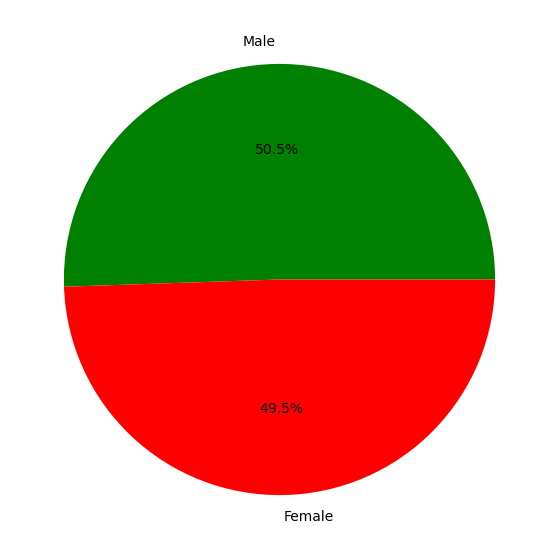

In [1374]:
#Let's represent this graphically.
fig = plt.figure(figsize=(10, 7))
plt.pie(gender_percentage, labels=gender,  autopct='%.1f%%', colors= 'green')


We can conclude that the counts for males and females are closely aligned, suggesting a balanced distribution between the genders

In [1376]:
# Now, I will check the age 

In [1377]:
df['Age']

0      27
1      28
2      28
3      28
4      28
       ..
369    59
370    59
371    59
372    59
373    59
Name: Age, Length: 374, dtype: int64

In [1378]:
#Let's convert this to percentages.

df['Age'].describe()

count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64

There are 374 participants in the dataset, with ages ranging from 27 to 59 years. The average age is 42.2 years, with a standard deviation of 8.7 years. 
The youngest participant is 27 years old, while the oldest is 59 years.'

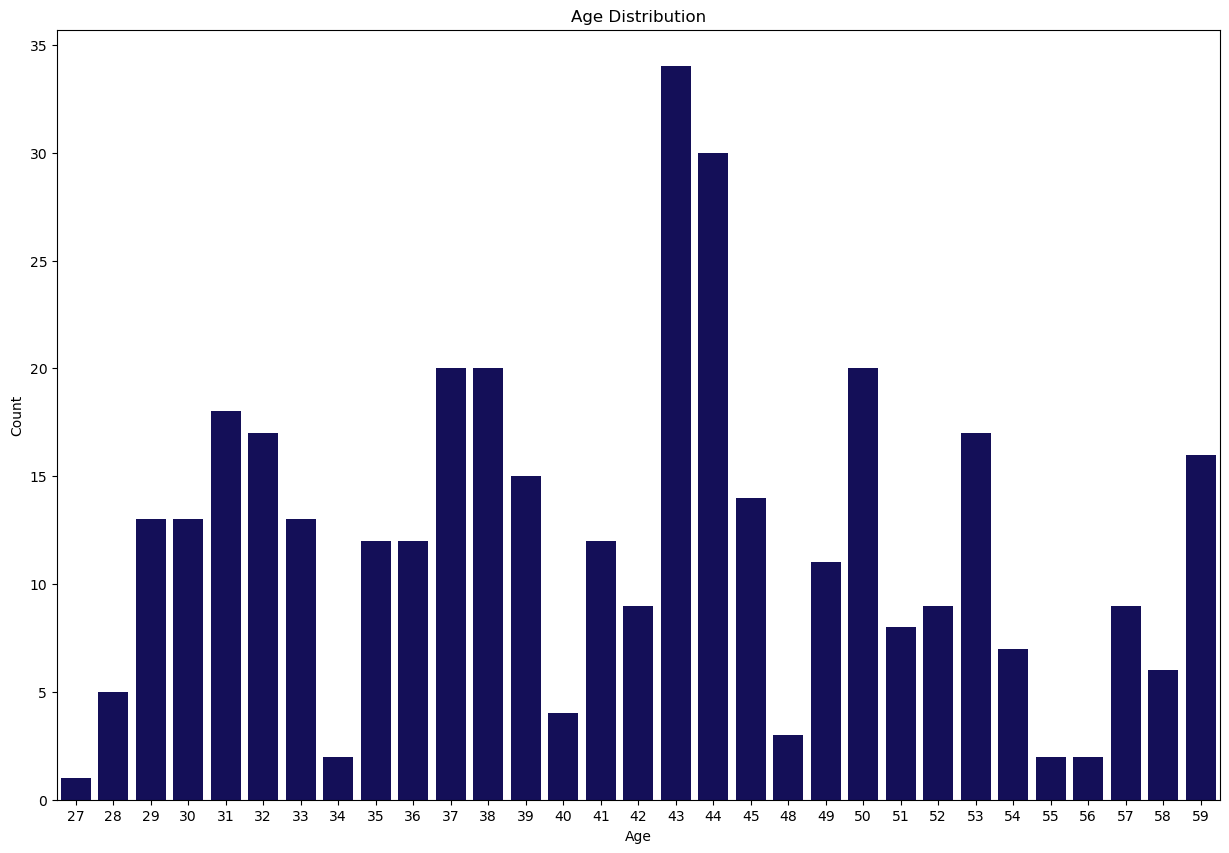

In [1380]:
#Let's visualize this with a graphic for better understanding. I've chosen Seaborn over Plotly to gain more experience with Seaborn.



plt.figure(figsize=(15, 10))
sns.countplot(data = df, x='Age')
plt.ylabel("Count")
plt.title('Age Distribution')
plt.show()

In [1381]:
# Let's analyze the participants' occupations. 

df['Occupation']

0         Software Engineer
1                    Doctor
2                    Doctor
3      Sales Representative
4      Sales Representative
               ...         
369                   Nurse
370                   Nurse
371                   Nurse
372                   Nurse
373                   Nurse
Name: Occupation, Length: 374, dtype: object

In [1398]:
df['Occupation'].describe()

count       374
unique       11
top       Nurse
freq         73
Name: Occupation, dtype: object

In [1399]:


df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [1400]:
occupation_count = df['Occupation'].value_counts().reset_index()

In [1401]:
print(occupation_count)

              Occupation  count
0                  Nurse     73
1                 Doctor     71
2               Engineer     63
3                 Lawyer     47
4                Teacher     40
5             Accountant     37
6            Salesperson     32
7              Scientist      4
8      Software Engineer      4
9   Sales Representative      2
10               Manager      1


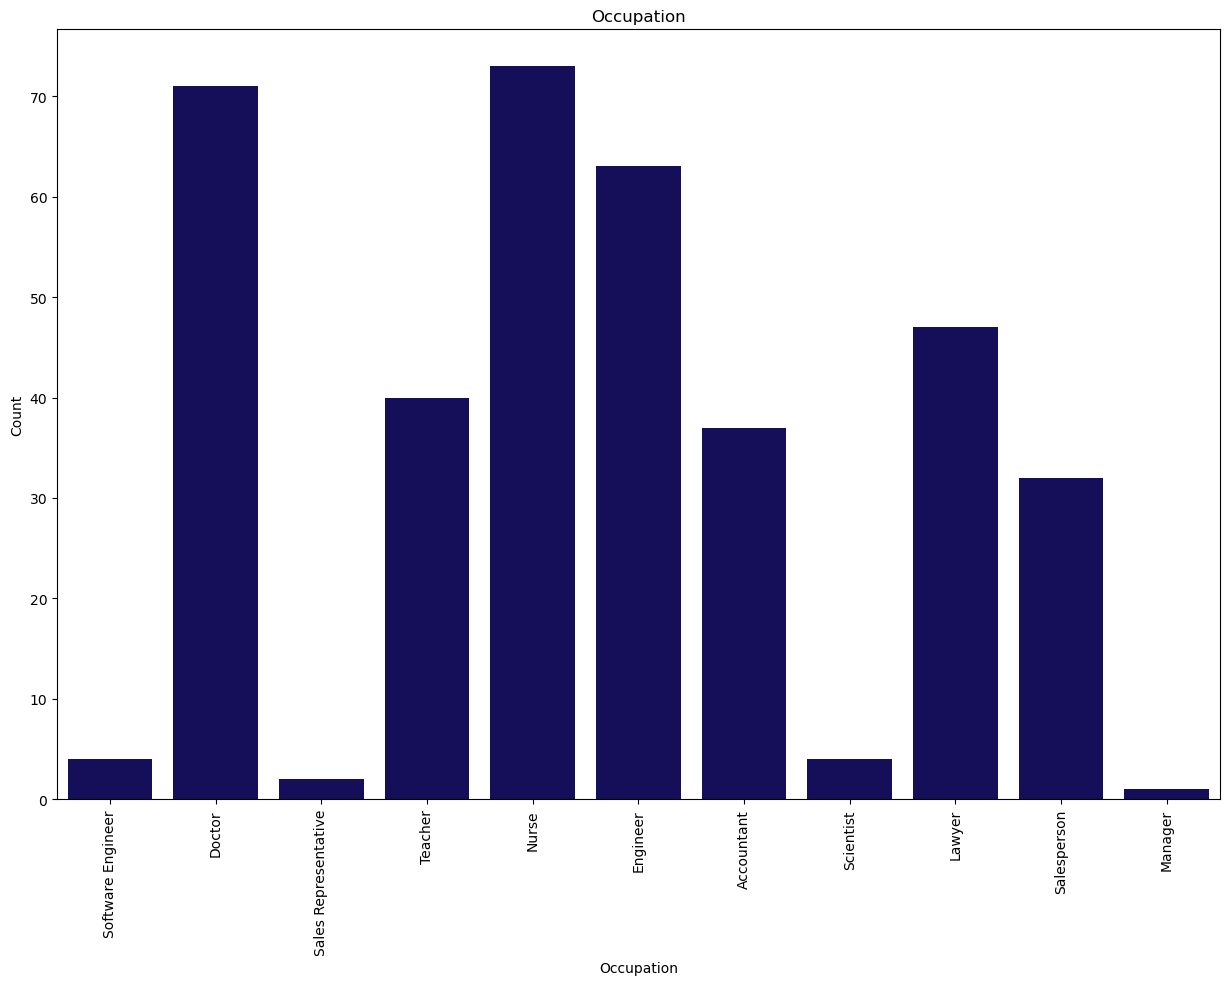

In [1402]:
plt.figure(figsize=(15, 10))
sns.countplot(data = df, x='Occupation')
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title('Occupation')
plt.show()

In [1403]:
#Now I will check the sleep duration 

df['Sleep Duration']

0      6.1
1      6.2
2      6.2
3      5.9
4      5.9
      ... 
369    8.1
370    8.0
371    8.1
372    8.1
373    8.1
Name: Sleep Duration, Length: 374, dtype: float64

In [1404]:
df['Sleep Duration'].describe().round(1)

count    374.0
mean       7.1
std        0.8
min        5.8
25%        6.4
50%        7.2
75%        7.8
max        8.5
Name: Sleep Duration, dtype: float64

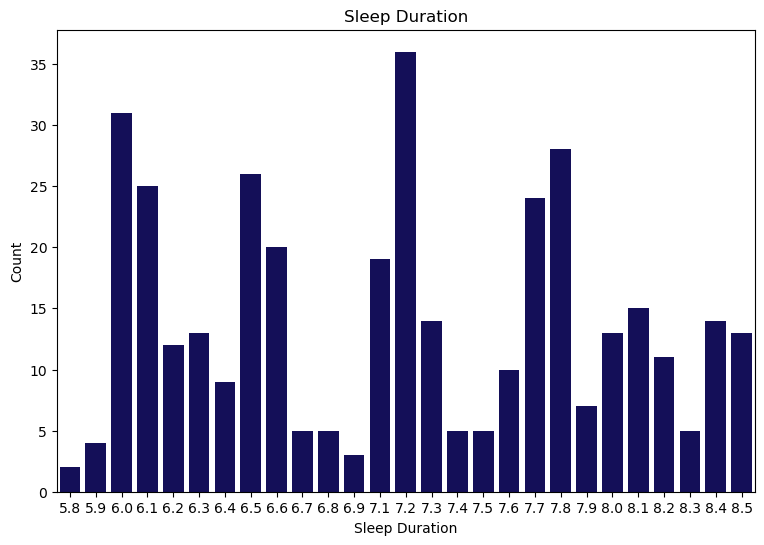

In [1405]:
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='Sleep Duration')
plt.ylabel("Count")
plt.title('Sleep Duration')
plt.show()

The average participant sleep duration was 7.1 hours, and the majority of participants slept between 6.4 and 7.8 hours.

In [1407]:
#We have another interesting index: quality of sleep.

df['Quality of Sleep'].unique()


array([6, 4, 7, 5, 8, 9])

In [1408]:

quality_of_sleep_count = df['Quality of Sleep'].value_counts().reset_index()
quality_of_sleep_count

,Quality of Sleep,count
0,8,109
1,6,105
2,7,77
3,9,71
4,5,7
5,4,5


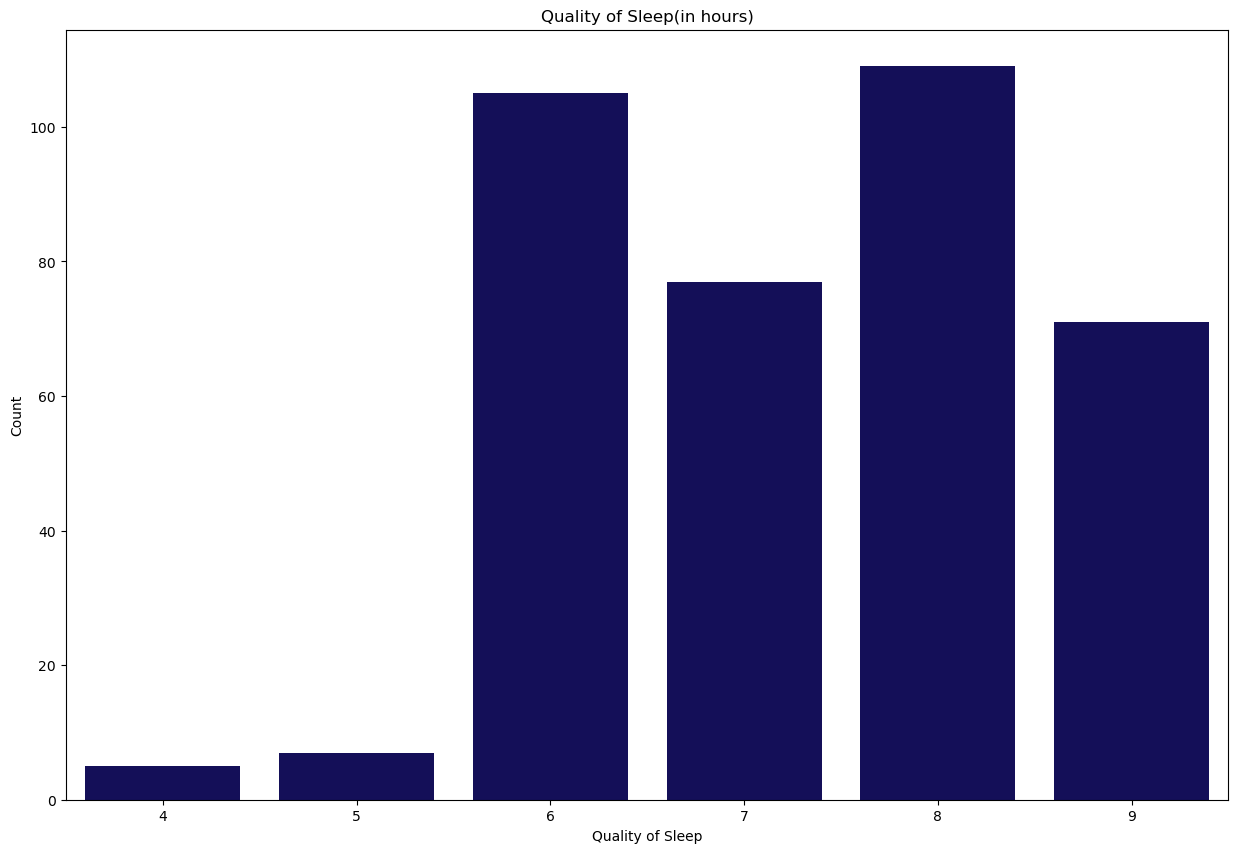

In [1409]:
plt.figure(figsize=(15, 10))
sns.countplot(data = df, x='Quality of Sleep')
plt.ylabel("Count")
plt.title('Quality of Sleep(in hours)')
plt.show()

In [1410]:
# Let's examine the activity levels of these participants.

df['Physical Activity Level']

0      42
1      60
2      60
3      30
4      30
       ..
369    75
370    75
371    75
372    75
373    75
Name: Physical Activity Level, Length: 374, dtype: int64

In [1411]:
df['Physical Activity Level'].describe()

count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

In [1412]:
physical_count = df['Physical Activity Level'].value_counts().reset_index()
physical_count

,Physical Activity Level,count
0,60,70
1,30,68
2,45,68
3,75,67
4,90,67
5,40,6
6,55,6
7,35,4
8,50,4
9,70,3


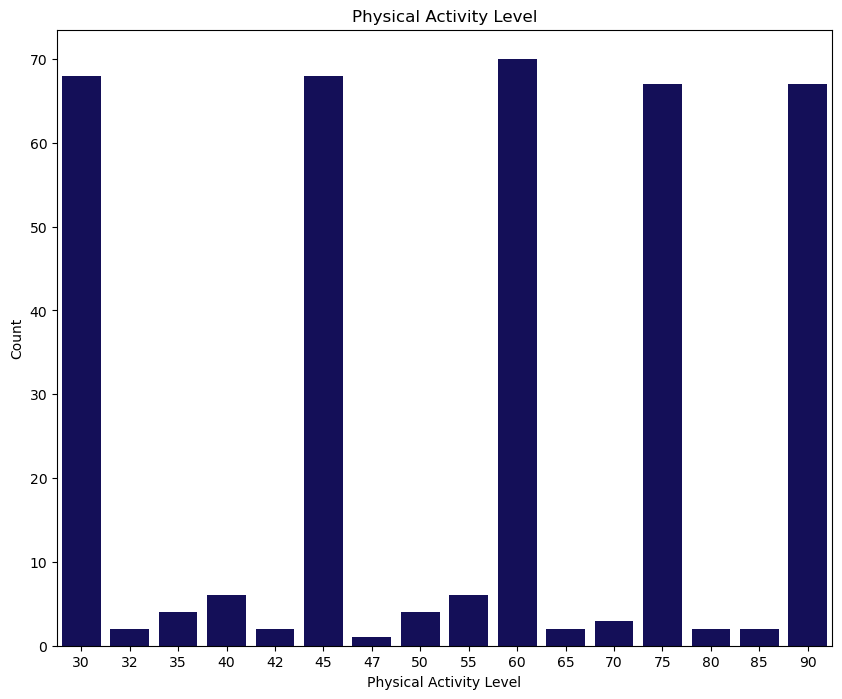

In [1413]:
plt.figure(figsize=(10, 8))
sns.countplot(data = df, x='Physical Activity Level')
plt.ylabel("Count")
plt.title('Physical Activity Level')
plt.show()

In [1414]:
#It can be concluded that the index quantifies activity on a scale ranging from 0 (non-active) to 100 (very active)



The average physical activity level reported by participants is 59, with a standard deviation of approximately 20.83, indicating some variability in reported activity levels.

In [1416]:
#Now, let's check the stress level

stress_level_counts=df['Stress Level'].value_counts().reset_index()

stress_level_counts

,Stress Level,count
0,3,71
1,8,70
2,4,70
3,5,67
4,7,50
5,6,46


In [1417]:
df['Stress Level'].describe()

count    374.000000
mean       5.385027
std        1.774526
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Stress Level, dtype: float64

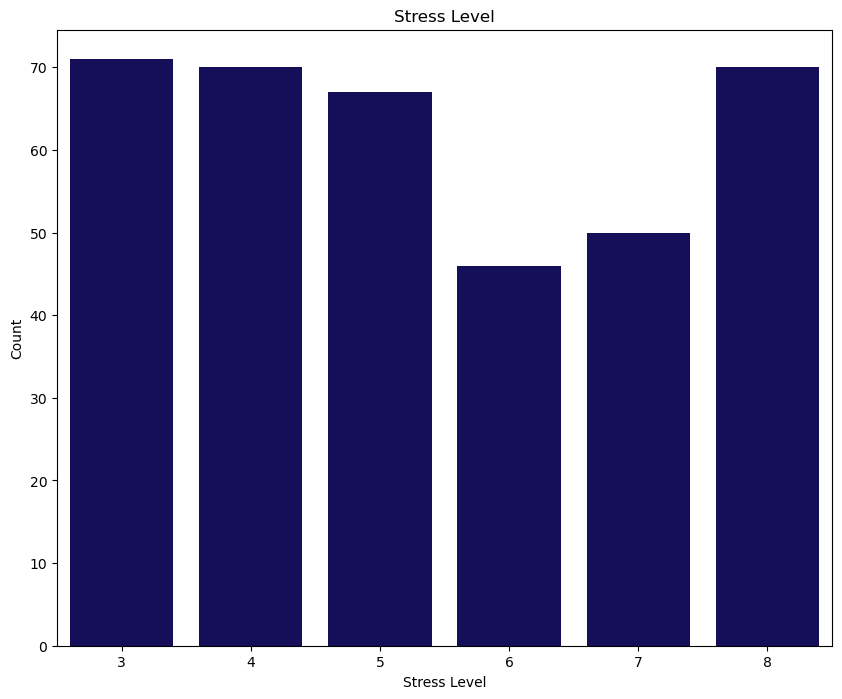

In [1418]:
plt.figure(figsize=(10, 8))
sns.countplot(data = df, x='Stress Level')
plt.ylabel("Count")
plt.title('Stress Level')
plt.show()

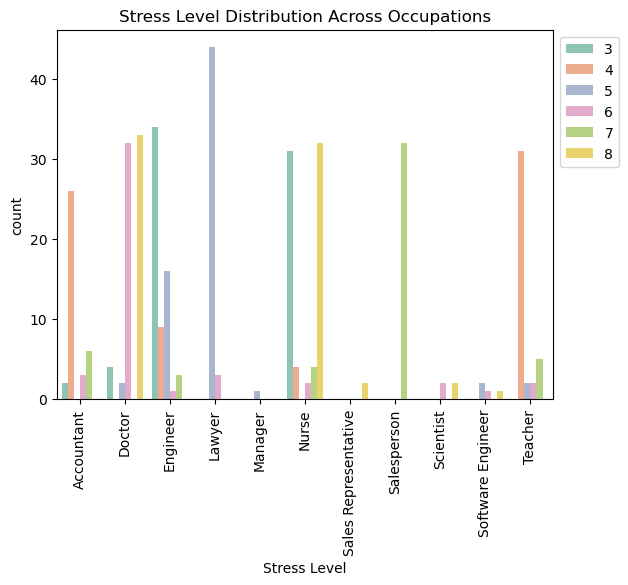

In [1419]:
#Let's analyze stress levels across different occupations. We will group the data by 'Occupation' 
#and 'Stress Level' to count occurrences. I'll also experiment with the 'Set2' color palette for visualization.

occupationstress = df.groupby('Occupation')['Stress Level'].value_counts().reset_index()
sns.barplot(data=occupationstress,x='Occupation',y='count',palette='Set2', hue='Stress Level', alpha=0.8,width=0.8) 
plt.title('Stress Level Distribution Across Occupations')
plt.xlabel('Stress Level')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.show()


In [1425]:
#Check the BMI

df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [1426]:
#As we can see, there are two similar categories: 'Normal' and 'Normal Weight'. Let's investigate the differences between them
df['BMI Category'].describe()

count        374
unique         4
top       Normal
freq         195
Name: BMI Category, dtype: object

In [1427]:
df['BMI Category']

0      Overweight
1          Normal
2          Normal
3           Obese
4           Obese
          ...    
369    Overweight
370    Overweight
371    Overweight
372    Overweight
373    Overweight
Name: BMI Category, Length: 374, dtype: object

In [1428]:
check=df['BMI Category'].str.contains('Normal').any()
print(check)

True


In [1429]:
check1 = df[df['BMI Category'].str.contains('Normal')] 
print(check1) 

     Person ID  Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
1            2    Male   28     Doctor             6.2                 6   
2            3    Male   28     Doctor             6.2                 6   
7            8    Male   29     Doctor             7.8                 7   
8            9    Male   29     Doctor             7.8                 7   
9           10    Male   29     Doctor             7.8                 7   
..         ...     ...  ...        ...             ...               ...   
336        337  Female   54   Engineer             8.4                 9   
337        338  Female   54   Engineer             8.4                 9   
338        339  Female   54   Engineer             8.5                 9   
341        342  Female   56     Doctor             8.2                 9   
342        343  Female   56     Doctor             8.2                 9   

     Physical Activity Level  Stress Level   BMI Category Blood Pressure  \
1          

In [1430]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [1431]:
#We conclude that 'Normal' and 'Normal Weight' represent the same category. Therefore, I will replace 'Normal' with 'Normal Weight'.

df['BMI Category'] = df['BMI Category'].replace({'Normal': 'Normal Weight'})

In [1432]:
df['BMI Category'].unique()

array(['Overweight', 'Normal Weight', 'Obese'], dtype=object)

In [1433]:
bmi_category_count=df['BMI Category'].value_counts()
bmi_category_percentage = df['BMI Category'].value_counts(normalize=True)

In [1434]:
print(bmi_category_count.head(10))

BMI Category
Normal Weight    216
Overweight       148
Obese             10
Name: count, dtype: int64


In [1435]:
#A subset of the data will be generated to demonstrate this information

In [1436]:
bmi_df = pd.DataFrame({
    'Count': bmi_category_count,
    'Proportion': bmi_category_percentage
})
bmi_df['Proportion'] = bmi_df['Proportion'].apply("{:.1%}".format)

bmi_df

,Count,Proportion
BMI Category,,
Normal Weight,216,57.8%
Overweight,148,39.6%
Obese,10,2.7%


([<matplotlib.patches.Wedge at 0x1f68b9c46a0>,
 [Text(-0.26531710677461573, 1.0675236919397841, 'Normal Weight'),
  Text(0.17481540841434265, -1.0860200610398165, 'Overweight'),
  Text(1.0961215313084505, -0.09229078286599182, 'Obese')],
 [Text(-0.1447184218770631, 0.5822856501489732, '57.8%'),
  Text(0.09535385913509598, -0.5923745787489908, '39.6%'),
  Text(0.5978844716227911, -0.050340427017813716, '2.7%')])

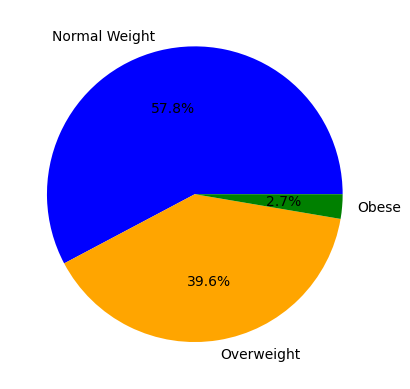

In [1437]:
# will use a pie chart to better represent this part of the dataset.
bmi_df['Proportion'] = pd.to_numeric(bmi_df['Proportion'], downcast='float', errors='coerce')
my_colors=['blue','orange','green']

plt.pie(bmi_category_count, labels=bmi_category_count.index, autopct='%1.1f%%',colors=my_colors)




We have the information :</p>
Normal Weight: 216 participants (57.8%)</p>
Overweight: 148 participants (39.6%)</p>
Obese: 10 participants (2.7%)</p>

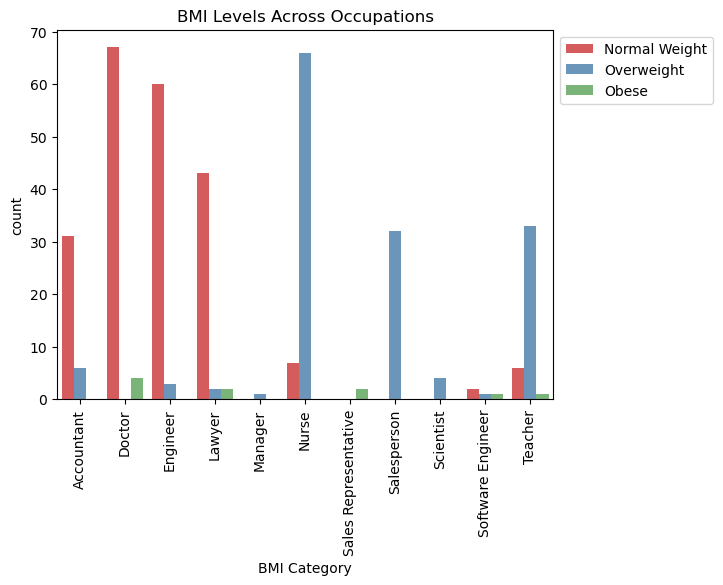

In [1439]:
#Let's examine across the professions.

BMI_professions=df.groupby('Occupation')['BMI Category'].value_counts().reset_index()

sns.barplot(data=BMI_professions,x='Occupation',y='count',palette='Set1', hue='BMI Category', alpha=0.8,width=0.8) 
plt.title('BMI Levels Across Occupations')
plt.xlabel('BMI Category')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.show()


In [1440]:
#now, let's check the blood pressure

In [1441]:
df['Blood Pressure']

0      126/83
1      125/80
2      125/80
3      140/90
4      140/90
        ...  
369    140/95
370    140/95
371    140/95
372    140/95
373    140/95
Name: Blood Pressure, Length: 374, dtype: object

In [1442]:
#As we can see, 'pressure' has two distinct categories. Let's investigate this further.


In [1443]:
#The 'Blood Pressure' column will be split into two separate columns, 'Systolic Pressure' and 'Diastolic Pressure'

splitting_pressure = df['Blood Pressure'].str.split('/', n=1, expand=True)

In [1448]:
splitting_pressure.head(10)

,0,1
0,126,83
1,125,80
2,125,80
3,140,90
4,140,90
5,140,90
6,140,90
7,120,80
8,120,80
9,120,80


In [1452]:
#as we can see, there are 2 columns, let's rename it
df['Systolic Pressure'] = splitting_pressure[0].astype(float) 
df['Diastolic Pressure'] = splitting_pressure[1].astype(float) 


In [1454]:
df['Systolic Pressure'].head(10)

0    126.0
1    125.0
2    125.0
3    140.0
4    140.0
5    140.0
6    140.0
7    120.0
8    120.0
9    120.0
Name: Systolic Pressure, dtype: float64

In [1457]:
df['Diastolic Pressure'].head(10)

0    83.0
1    80.0
2    80.0
3    90.0
4    90.0
5    90.0
6    90.0
7    80.0
8    80.0
9    80.0
Name: Diastolic Pressure, dtype: float64

Research, as cited by Harvard Health, indicates that although both systolic and diastolic pressures are significant indicators of cardiovascular health, higher systolic pressures are associated 
with a greater risk of stroke and heart disease. Consequently, systolic pressure should be prioritized in monitoring</p>

https://www.health.harvard.edu/staying-healthy/which-blood-pressure-number-is-important

In [1463]:
df['Systolic Pressure'].describe()

count    374.000000
mean     128.553476
std        7.748118
min      115.000000
25%      125.000000
50%      130.000000
75%      135.000000
max      142.000000
Name: Systolic Pressure, dtype: float64

In [1464]:

df['Systolic Pressure'].value_counts().reset_index()

,Systolic Pressure,count
0,130.0,101
1,125.0,69
2,140.0,69
3,120.0,45
4,115.0,34
5,135.0,29
6,128.0,5
7,132.0,3
8,118.0,3
9,126.0,2


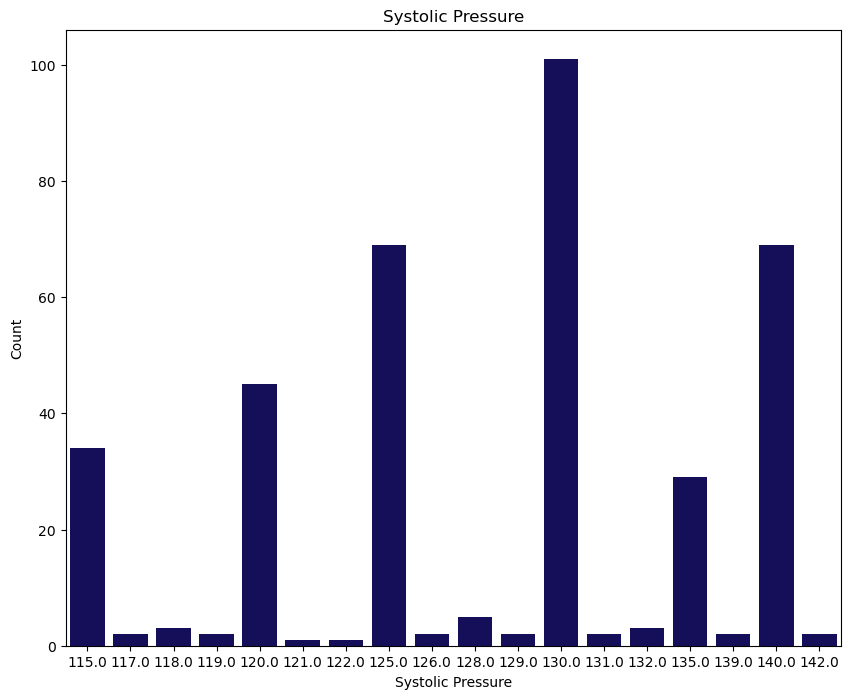

In [1469]:
plt.figure(figsize=(10, 8))
sns.countplot(data = df, x=df['Systolic Pressure'])
plt.ylabel("Count")
plt.title('Systolic Pressure')
plt.show()

In [1470]:
from IPython.display import Image 
  
# get the image 
Image(url="table.png", width=1000, height=1000) 

In [1472]:
#We will now construct a graphical representation of the association between occupation and elevated blood pressure

df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True)
print(df.head(10))

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   
5          6   Male   28     Software Engineer             5.9   
6          7   Male   29               Teacher             6.3   
7          8   Male   29                Doctor             7.8   
8          9   Male   29                Doctor             7.8   
9         10   Male   29                Doctor             7.8   

   Quality of Sleep  Physical Activity Level  Stress Level   BMI Category  \
0                 6                       42             6     Overweight   
1                 6                       60             8  Normal Weight   
2                 6                       

In [1474]:
#let's find out more about participants with high blood pressure

# Filter for systolic blood pressure > 130 mmHg( high blood pressure
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert to integers (optional)
df['Systolic Pressure'] = df['Systolic Pressure'].astype(int)
df['Diastolic Pressure'] = df['Diastolic Pressure'].astype(int)

high_pressure = df[df['Systolic Pressure'] > 130]

#now let's analize which professions have high blood pressure
high_pressure

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,140,90
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,140,90
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea,132,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


In [1475]:
occupation_percent = df.groupby('Occupation')['Systolic Pressure'].apply( lambda x: (x >= 130).mean() * 100 ).sort_values(ascending=False).reset_index(name='Percentage')

# Filter occupations with at least 5 people ( to avoid small samples)
occupation_percent = occupation_percent[df['Occupation'].value_counts()[occupation_percent['Occupation']].values >= 5]

C:\Users\rodri\AppData\Local\Temp\ipykernel_32140\2201898581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


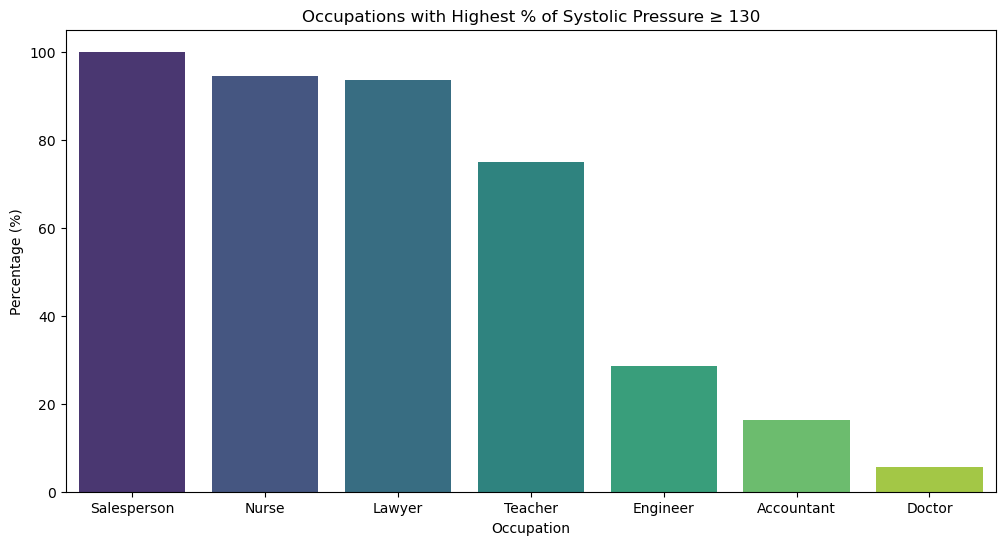

In [1480]:
plt.figure(figsize=(12, 6))
sns.barplot(
    y='Percentage',
    x='Occupation',
    data=occupation_percent.head(10),  # Top 10 professions
    palette='viridis'
)
plt.title('Occupations with Highest % of Systolic Pressure ≥ 130')
plt.ylabel('Percentage (%)')
plt.xlabel('Occupation')
plt.show()


In [1489]:
#Let's analyze the participants' step count

df['Daily Steps']

0       4200
1      10000
2      10000
3       3000
4       3000
       ...  
369     7000
370     7000
371     7000
372     7000
373     7000
Name: Daily Steps, Length: 374, dtype: int64

In [1491]:
df['Daily Steps'].describe()

count      374.000000
mean      6816.844920
std       1617.915679
min       3000.000000
25%       5600.000000
50%       7000.000000
75%       8000.000000
max      10000.000000
Name: Daily Steps, dtype: float64

In [1492]:
df['Daily Steps'].value_counts().reset_index()

,Daily Steps,count
0,8000,101
1,5000,68
2,6000,68
3,7000,66
4,10000,36
5,5500,4
6,3000,3
7,3500,3
8,6800,3
9,4000,3


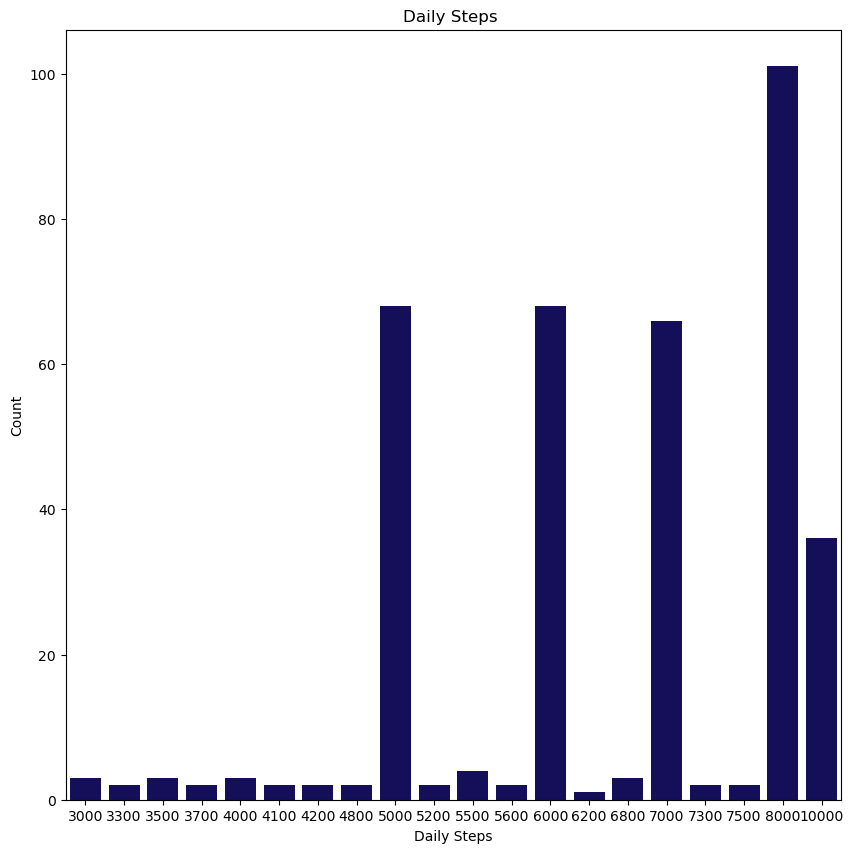

In [1493]:
plt.figure(figsize=(10,10))
sns.countplot(data = df, x=df['Daily Steps'])
plt.ylabel("Count")
plt.title('Daily Steps ')
plt.show()

Participants took an average of 6,816.84 steps per day, with a range from 3,000 to 10,000 steps.

In [1495]:
#We will now examine the 'Sleep Disorder' column.

df['Sleep Disorder']

0             None
1             None
2             None
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

In [1496]:
#I will try to find out more about what conditions we have as sleep disorder
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [1497]:
sleep_disorder_counts = df['Sleep Disorder'].value_counts()



In [1498]:
print(sleep_disorder_counts)

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [1499]:


sleep_disorder_perc= df['Sleep Disorder'].value_counts(normalize=True)

In [1505]:
print(sleep_disorder_perc)

Sleep Disorder
None           0.585561
Sleep Apnea    0.208556
Insomnia       0.205882
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge at 0x1f685d771c0>,
 [Text(-0.29213162751863764, 1.0604994635563527, 'None'),
  Text(-0.40596743002101227, -1.022345560836518, 'Sleep Apnea'),
  Text(0.8778189842549604, -0.6628980546672238, 'Insomnia')],
 [Text(-0.15934452410107505, 0.5784542528489196, '58.6%'),
  Text(-0.22143678001146122, -0.5576430331835552, '20.9%'),
  Text(0.47881035504816016, -0.361580757091213, '20.6%')])

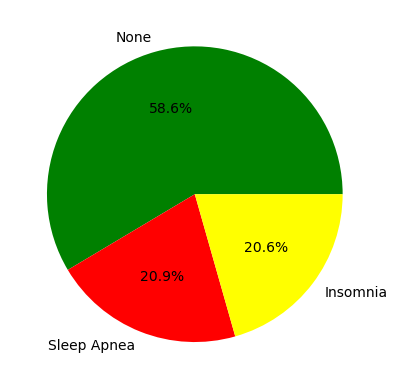

In [1507]:
#I will put it in a pie graphic
my_colors=('green','red','yellow')

plt.pie(sleep_disorder_counts, labels=sleep_disorder_perc.index, autopct='%1.1f%%',colors=my_colors)

> **Websites:** This is a useful resource from which I obtain most commands and steps:
.</p> https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/.</p>
.</p>https://www.geeksforgeeks.org/python-pandas-dataframe/.</p>
.</p>https://www.geeksforgeeks.org/matplotlib-tutorial/.</p>
.</p>https://www.geeksforgeeks.org/python-seaborn-tutorial/.</p>
.</p> https://www.markdownguide.org/hacks/#:~:text=Markdown%20doesn't%20allow%20you,or%20the%20hexadecimal%20%23RRGGBB%20code..</p>